# Recomender systems and OCR

Ejemplos de aplicaciones  e-market 

* Seleccionar canciones en Spotify
* enviar cupones en Walmart
* mostar anuncios al lado del email (google)
* sugerir peliculas en Netflix o Hulu
* libros en Amazon





## Basados en contenido
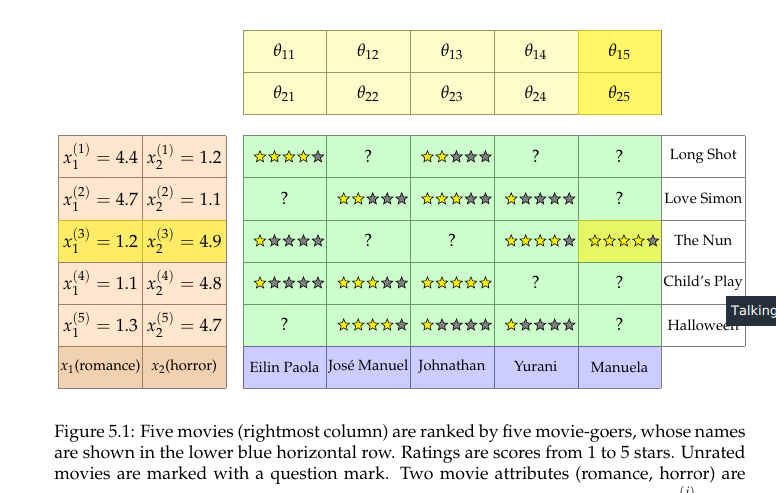

La tabla verde viene del producto de los features $x^{(i)}$ con los $\theta$s

por ejemplo

$$ y_{ij} = (x^{(i)})^T \Theta_j  $$

Por ejemplo

$$ y_{35} = x_1^{(3)} \theta_{15} + x_2^{(3)} \theta_{25} = (1.2, 4.9) \cdots (\theta_{15}, \theta_{25}) = 4.0 $$

El modelo de siempre. Construir una funcion objetivo y optimizarla

$$J_{\Theta} = \frac12 \| Y -  X \Theta \|^2 + \frac{\lambda}{2} \| \Theta \|_F^2  $$

Que hacemos con las interrogaciones ?
"masking"

Definimos el "masking operator"

\begin{eqnarray}
r_{ij} = \left \{
    \begin{array}{cc}
    1 & \text{ si  $i$ pelicula fue calificada por el usuario j} \\
    0 & \text{de lo contrario}
    \end{array}
    \right .
\end{eqnarray}
A $r_{ij}$ lo llamos la matriz $R$.
Con esto redefinimos nuestra funcion objetivo

$$ J_{\theta} = \frac12 \| R \circ ( Y- X \Theta ) \|^2 + \frac{\lambda}{2} \| \Theta \|_F^2 $$

Lo que sigue es calcular el gradiente y usar "gradient descent".


## Collaborative Filtering

Que pasa si no conocemos $X$ (los features).

Si no conocemos $X$ cambiamos la funcion objetivo a:

$$ J_{X} = \frac12 \| R \circ ( Y- X \Theta ) \|^2 + \frac{\lambda}{2} \| X \|_F^2 $$

Pero....y si no conocemos $\Theta$.

Hay varias alternativas:

* Se asume un $X_1$ aleatorio. Con este hallamos $\Theta_1$ y con $\Theta_1$ un $X_2$ y asi sucesivamente hasta convergencia.

$$ X_1 \rightarrow \Theta_1 \rightarrow X_2 \rightarrow \Theta_2 \rightarrow \cdots \rightarrow X_n \rightarrow \Theta_n$$
Que es convergencia: Puede ser que  $\| X_n - X_{n-1} \| < \epsilon$,
y $\| \Theta_n - \Theta_{n-1} \| < \epsilon $.

* Si este sistema no funciona podemos invertir simultaneamente por $X, \Theta$.

$$J = J(\Theta , X) = \frac12 \| R \circ (Y - X \Theta ) \|_F^2 + \frac{\lambda}{2} ( \| \Theta \|_F^2 + \| X \|_F^2 )  $$




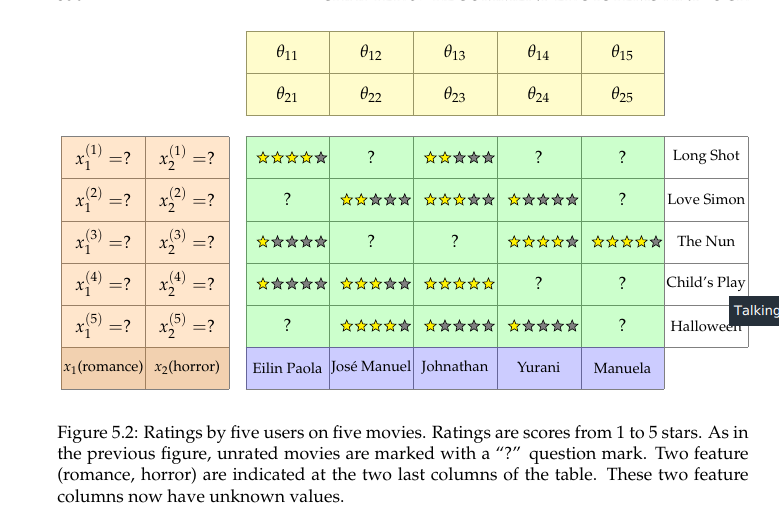

## como un ejercicio en CVV hallemos el gradiente de la funcion $J(\Theta, X)$

Este tipo de ejercicioes es mas facil con components.
 

$$J = \frac12   \sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij} \left ( y_{ij} - \sum_{k=1}^{n_f} x_{ik} \theta_{kj}  \right )^2 + \frac{\lambda}{2} \left ( \sum_{i=1}^{n_f} \sum_{j=1}^{n_u} \theta_{ij}^2  + \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} x_{ij}^2
    \right ) $$

$$\frac{\partial J}{\partial x_{st}} = \sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij} \left (  \sum_{k=1}^{n_f} x_{ik} \theta_{kj} - y_{ij}   \right ) \sum_{k=1}^{n_f} \theta_{kj} \frac{\partial x_{ik}}{\partial x_{st}} + \lambda \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} \frac{\partial x_{ij}}{ \partial x_{st}} $$


\begin{eqnarray}
\frac{\partial J}{\partial x_{st}} &=&\sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij} \left (  \sum_{p=1}^{n_f} x_{ik} \theta_{kj} - y_{ij}   \right ) \sum_{p=1}^{n_f} \theta_{pj} \frac{\partial x_{ip}}{\partial x_{st}} + \lambda \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} \frac{\partial x_{ij}}{ \partial x_{st}} x_{ij} \\
&=& \sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij} \left (  \sum_{p=1}^{n_f} x_{ik} \theta_{kj} - y_{ij}   \right ) \sum_{p=1}^{n_f} \theta_{pj}\delta_{is} \delta_{pt}  + \lambda \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} \delta_{is} \delta_{jt} x_{ij} \\
&=& \sum_{j=1}^{n_m} r_{sj}  \left (  \sum_{p=1}^{n_f} x_{sk} \theta_{kj} - y_{sj}   \right ) \theta_{tj}  + \lambda x_{st}
\end{eqnarray}

En forma matricial:
$$\nabla_X J =   R \circ (X \Theta - Y ) \Theta^T + \lambda X$$
se deja al estudiante probar que

$$\nabla J_{\Theta} = X^T[ R \circ ( X \Theta - Y)] + \lambda \Theta $$

Como se califica una pelicula. Se tiene $X, \Theta$.
Necesita dos indices $(i,j)$. 

$$ \text{rating}_{ij} = Y_{ij} = (X^{(i)})^T \Theta_j$$




## Mean normalization (normalizacion usando la media)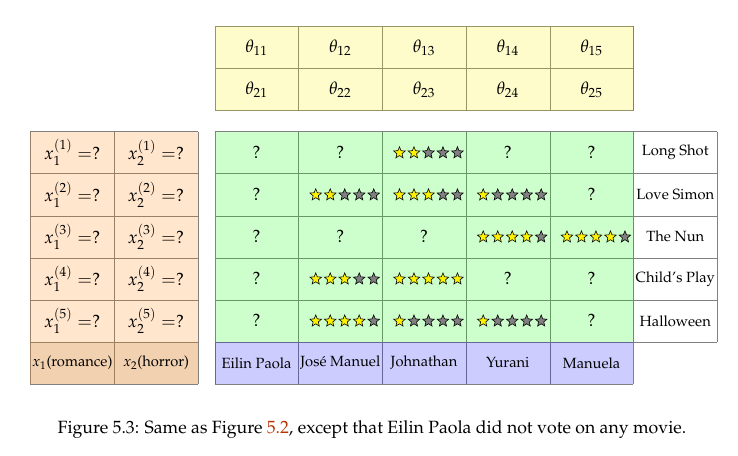

La funcion objetivo es la suma de las funciones objetivo por usuario

$$ J = \frac12 \sum_{j=1}^{n_u} J^{j} $$
Centremonos en Elin Paola.
$r_{ij}=0$, $i=1,2, 3, 4, 5$.

Quedamos para Eilin Paola con la funcion objetivo

$$J^{(j_0)} = \frac{\lambda}{2} ( \| \Theta_{j_0} \|_F^2 + \| X \|_F^2 ) $$

El minimo para $\Theta_{j_0}$ es cuando $\Theta_{j_0}=0$.



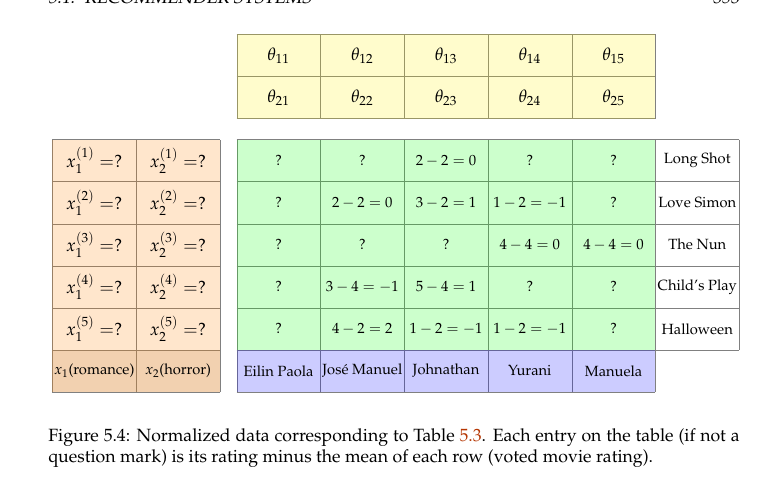

Como $\Theta_{j}=0$ para el optimo

$$ Y_{ij} =  (X^{(i)})^T  \Theta_{(j)} = 0 $$

Luego de que resuelve el problema normalizado
En el caso de Eilin Paola:

$$y_{i1} = ( X^{(i)})^T \Theta_1 + \mu_i  $$



Dado un $X_i$ se puede buscar el $X_j$ mas proximo a $X_i$, 
$\| X_i - X_j \|_F^2 < \epsilon $ . Si no tiviesemos la informacion de


# OCR: Optical Character Recognition











Aplicaciones *********  (Tesseract....)

Pasos para detectar (texto o otros objetos)

* Deteccion de texto
* Segmentacion de texto
* Clasificacion
* Procesamiento de palabra.

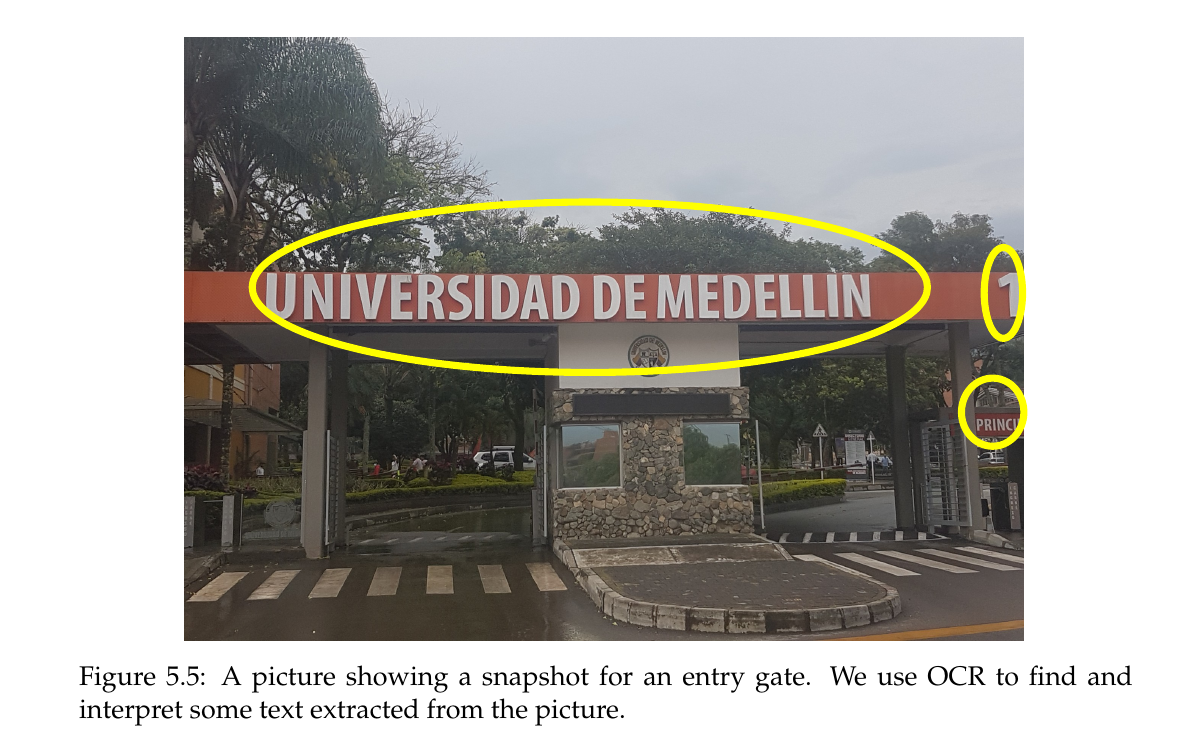

1. item 1
2. item 2
3. item 3

* item 1
* item 2
    * item 2a
    * item 31
* item 



| Syntax      | Description |
| ----------- | ----------- |
| Header      | Title       |
| Paragraph   | Text        |

$f(x)=7$

In [2]:
import os

In [3]:
ls

sample_data/
